In [1]:
import scanpy as sc
print(sc.__version__)


1.10.1


/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


umap_result形状: (106, 3)
clusters_df形状: (106, 2)
数据框形状: (106, 5)
     cell_id cluster_id    UMAP_1    UMAP_2     UMAP_3
0     2-10-1          0 -2.643259 -0.757259  10.092086
1    2-101-2          0 -2.796085 -0.284219   9.322929
2    2-104-2          0 -2.664969 -1.545387   9.682956
3    2-105-1          1 -2.111980  0.667635  10.658815
4    2-105-2          0 -1.077856 -0.016406   8.679852
..       ...        ...       ...       ...        ...
101  NPB-8-1          0 -1.662570 -1.928306  11.101103
102  PB-11-1          0 -2.468660 -2.123486   9.276681
103   PB-4-1          0 -0.358185  0.597917  10.430513
104   PB-7-2          1 -1.644352  1.380399   9.916547
105   PB-8-1          1 -3.461890 -0.890831   9.460978

[106 rows x 5 columns]


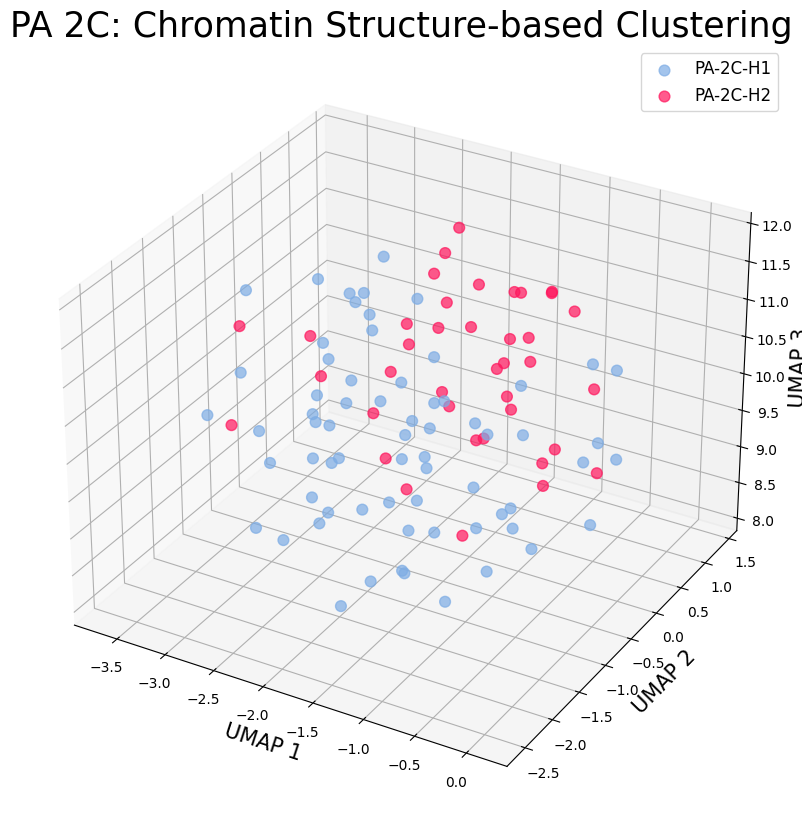

In [3]:
#PA 2c UMAP 40k TAD boundary_1k_seed 0 10 20 30 60 99
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 99
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/PA_2C_40k_1k_TADboundary_distribution.txt", sep="\t", index_col=0).transpose()

# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# 主成分分析（PCA），并可视化 PCA 的方差比例
sc.tl.pca(adata, random_state=seed)

# 使用 PCA 结果计算细胞之间的近邻关系，使用原始数据进行邻域计算
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 使用 UMAP 算法对数据进行降维
sc.tl.umap(adata, n_components=3, random_state=seed)
# 获取UMAP结果
umap_result = adata.obsm['X_umap']

# 打印UMAP结果的形状
print("umap_result形状:", umap_result.shape)

# 使用 Leiden 算法进行细胞聚类,通过调整resolution大小调整聚类数量多少
sc.tl.leiden(adata, flavor="igraph", resolution=0.895, random_state=seed)

# 获取聚类结果
clusters = adata.obs["leiden"]

# 构建包含细胞 ID 和对应聚类 ID 的列表
data = [(cell_id, cluster_id) for cell_id, cluster_id in clusters.items()]

# 转换为数据框
clusters_df = pd.DataFrame(data, columns=["cell_id", "cluster_id"])
print("clusters_df形状:", clusters_df.shape)

# 将UMAP结果转换为数据框，并设置列名为 'UMAP_1', 'UMAP_2' 和 'UMAP_3'
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# 将聚类结果和UMAP结果左右拼接为一个新的数据框
combined_df = pd.concat([clusters_df, umap_df], axis=1)

# 打印新数据框的形状
print("数据框形状:", combined_df.shape)
print(combined_df)

with open('PA_2C_40k_TADboundary_1k_UMAP_seed99.txt', 'w') as file:
    # 遍历DataFrame的每一行
    for index, row in combined_df.iterrows():
        # 将每行内容转换为字符串
        line = '\t'.join([str(value) for value in row.values])
        # 写入文件
        file.write(line + '\n')
        
# 计算每个聚类的细胞数量
cluster_sizes = combined_df["cluster_id"].value_counts()

# 根据细胞数量分配颜色，细胞多的用红色，少的用蓝色
color_map = {cluster_id: '#7dace4' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '#ff165d' 
             for cluster_id in cluster_sizes.index}

# 三维绘图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个聚类的散点图，颜色根据聚类的细胞数量
for cluster_id in combined_df["cluster_id"].unique():
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"PA-2C-H{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,  # 调整散点透明度
        s=60,  # 调整散点大小
        c=color_map[cluster_id]  # 设置颜色
    )

ax.set_title("PA 2C: Chromatin Structure-based Clustering", fontsize=25)  # 调整标题字体大小
ax.set_xlabel("UMAP 1", fontsize=15)  # 调整x轴标签字体大小
ax.set_ylabel("UMAP 2", fontsize=15)  # 调整y轴标签字体大小
ax.set_zlabel("UMAP 3", fontsize=15)  # 调整z轴标签字体大小
plt.legend(fontsize=12)  # 调整图例字体大小
# 保存图片为 PDF
plt.savefig('PA_2C_Chromatin_Structure-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)



/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


umap_result形状: (194, 3)
clusters_df形状: (194, 2)
数据框形状: (194, 5)
     cell_id cluster_id     UMAP_1    UMAP_2    UMAP_3
0    4-100-1          0   8.227152  6.478743  3.171328
1    4-100-2          0   9.835279  6.161525  2.003853
2    4-100-3          1   9.714829  6.346812  3.976260
3    4-104-3          0   9.439295  5.635978  2.754509
4      4-1-1          0  10.779097  5.820198  2.197036
..       ...        ...        ...       ...       ...
189   Y4-4-1          1  11.609145  7.256082  2.562579
190   Y4-4-2          0   7.717615  5.757544  2.437721
191   Y4-7-2          0   8.281442  5.507424  2.370531
192   Y4-7-3          0   8.089021  5.199238  3.008157
193   Y4-7-4          1   9.527551  4.603210  1.269913

[194 rows x 5 columns]


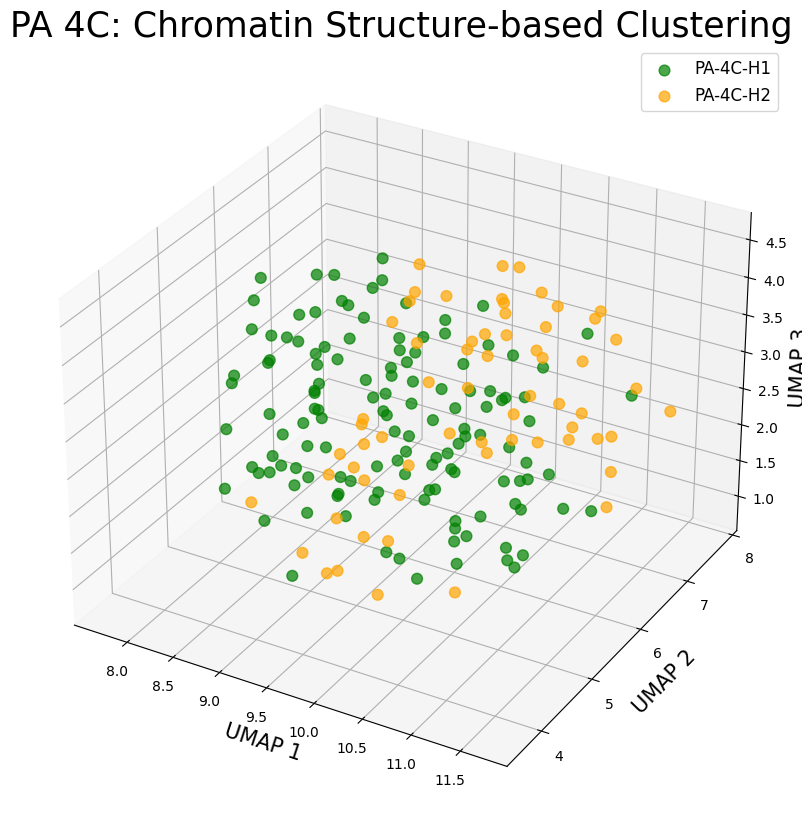

In [4]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 0
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/PA_4C_40k_1k_TADboundary_distribution.txt", sep="\t", index_col=0).transpose()

# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# 主成分分析（PCA），并可视化 PCA 的方差比例
sc.tl.pca(adata, random_state=seed)

# 使用 PCA 结果计算细胞之间的近邻关系，使用原始数据进行邻域计算
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 使用 UMAP 算法对数据进行降维
sc.tl.umap(adata, n_components=3, random_state=seed)
# 获取UMAP结果
umap_result = adata.obsm['X_umap']

# 打印UMAP结果的形状
print("umap_result形状:", umap_result.shape)

# 使用 Leiden 算法进行细胞聚类
sc.tl.leiden(adata, flavor="igraph", resolution=0.835, random_state=seed)

# 获取聚类结果
clusters = adata.obs["leiden"]

# 构建包含细胞 ID 和对应聚类 ID 的列表
data = [(cell_id, cluster_id) for cell_id, cluster_id in clusters.items()]

# 转换为数据框
clusters_df = pd.DataFrame(data, columns=["cell_id", "cluster_id"])
print("clusters_df形状:", clusters_df.shape)

# 将UMAP结果转换为数据框，并设置列名为 'UMAP_1', 'UMAP_2' 和 'UMAP_3'
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# 将聚类结果和UMAP结果左右拼接为一个新的数据框
combined_df = pd.concat([clusters_df, umap_df], axis=1)

# 打印新数据框的形状
print("数据框形状:", combined_df.shape)
print(combined_df)

with open('PA_4C_40k_TADboundary_1k_UMAP_seed0.txt', 'w') as file:
    # 遍历DataFrame的每一行
    for index, row in combined_df.iterrows():
        # 将每行内容转换为字符串
        line = '\t'.join([str(value) for value in row.values])
        # 写入文件
        file.write(line + '\n')

# 计算每个聚类的细胞数量
cluster_sizes = combined_df["cluster_id"].value_counts()

# 根据细胞数量分配颜色，细胞多的用红色，少的用蓝色
color_map = {cluster_id: 'green' if cluster_sizes[cluster_id] > cluster_sizes.mean() else 'orange' 
             for cluster_id in cluster_sizes.index}

# 三维绘图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个聚类的散点图，颜色根据聚类的细胞数量
for cluster_id in combined_df["cluster_id"].unique():
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"PA-4C-H{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,  # 调整散点透明度
        s=60,  # 调整散点大小
        c=color_map[cluster_id]  # 设置颜色
    )

ax.set_title("PA 4C: Chromatin Structure-based Clustering", fontsize=25)  # 调整标题字体大小
ax.set_xlabel("UMAP 1", fontsize=15)  # 调整x轴标签字体大小
ax.set_ylabel("UMAP 2", fontsize=15)  # 调整y轴标签字体大小
ax.set_zlabel("UMAP 3", fontsize=15)  # 调整z轴标签字体大小
plt.legend(fontsize=12)  # 调整图例字体大小
# 保存图片为 PDF
plt.savefig('PA_4C_Chromatin_Structure-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


umap_result形状: (101, 3)
clusters_df形状: (101, 2)
数据框形状: (101, 5)
         cell_id cluster_id    UMAP_1    UMAP_2    UMAP_3
0    IVF-2-101-1          0  2.532986  2.475175 -0.760855
1    IVF-2-101-2          0  2.597098  2.853327 -1.653010
2    IVF-2-102-2          0  2.058161  2.588322 -1.644278
3    IVF-2-104-1          0  3.501003  1.890248 -0.977947
4    IVF-2-104-2          0  3.432590  2.294384 -2.092547
..           ...        ...       ...       ...       ...
96    IVF-2-59-2          1  4.915797  0.760739 -0.513965
97    IVF-2-64-1          0  3.771143  2.013963 -2.908157
98    IVF-2-71-2          0  1.802511  1.883507 -2.565759
99     IVF-2-8-1          0  2.636654  1.588421  0.173742
100    IVF-2-8-2          1  4.611344  0.674967  0.024151

[101 rows x 5 columns]


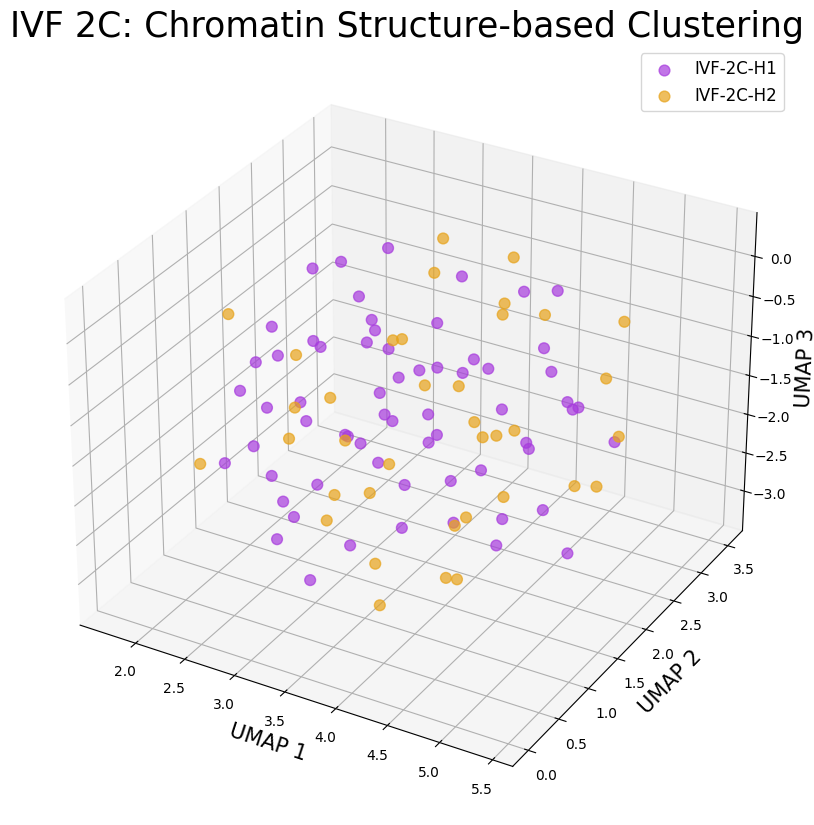

In [5]:
#IVF 2c UMAP 40k TAD boundary_1k_seed 0 10 20 30 60 99
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 99
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/IVF_2C_40k_1k_TADboundary_distribution.txt", sep="\t", index_col=0).transpose()

# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# 主成分分析（PCA），并可视化 PCA 的方差比例
sc.tl.pca(adata, random_state=seed)

# 使用 PCA 结果计算细胞之间的近邻关系，使用原始数据进行邻域计算
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 使用 UMAP 算法对数据进行降维
sc.tl.umap(adata, n_components=3, random_state=seed)
# 获取UMAP结果
umap_result = adata.obsm['X_umap']

# 打印UMAP结果的形状
print("umap_result形状:", umap_result.shape)

# 使用 Leiden 算法进行细胞聚类,通过调整resolution大小调整聚类数量多少
sc.tl.leiden(adata, flavor="igraph", resolution=0.9, random_state=seed)

# 获取聚类结果
clusters = adata.obs["leiden"]

# 构建包含细胞 ID 和对应聚类 ID 的列表
data = [(cell_id, cluster_id) for cell_id, cluster_id in clusters.items()]

# 转换为数据框
clusters_df = pd.DataFrame(data, columns=["cell_id", "cluster_id"])
print("clusters_df形状:", clusters_df.shape)

# 将UMAP结果转换为数据框，并设置列名为 'UMAP_1', 'UMAP_2' 和 'UMAP_3'
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# 将聚类结果和UMAP结果左右拼接为一个新的数据框
combined_df = pd.concat([clusters_df, umap_df], axis=1)

# 打印新数据框的形状
print("数据框形状:", combined_df.shape)
print(combined_df)

with open('IVF_2C_40k_TADboundary_1k_UMAP_seed99.txt', 'w') as file:
    # 遍历DataFrame的每一行
    for index, row in combined_df.iterrows():
        # 将每行内容转换为字符串
        line = '\t'.join([str(value) for value in row.values])
        # 写入文件
        file.write(line + '\n')

# 根据细胞数量分配颜色，细胞多的用红色，少的用蓝色
color_map = {cluster_id: '#A73BDD' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '#E7A31B' 
             for cluster_id in cluster_sizes.index}

# 三维绘图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个聚类的散点图，颜色根据聚类的细胞数量
for cluster_id in combined_df["cluster_id"].unique():
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"IVF-2C-H{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,  # 调整散点透明度
        s=60,  # 调整散点大小
        c=color_map[cluster_id]  # 设置颜色
    )

ax.set_title("IVF 2C: Chromatin Structure-based Clustering", fontsize=25)  # 调整标题字体大小
ax.set_xlabel("UMAP 1", fontsize=15)  # 调整x轴标签字体大小
ax.set_ylabel("UMAP 2", fontsize=15)  # 调整y轴标签字体大小
ax.set_zlabel("UMAP 3", fontsize=15)  # 调整z轴标签字体大小
plt.legend(fontsize=12)  # 调整图例字体大小
# 保存图片为 PDF
plt.savefig('IVF_2C_Chromatin_Structure-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)



/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


umap_result形状: (208, 3)
clusters_df形状: (208, 2)
数据框形状: (208, 5)
         cell_id cluster_id    UMAP_1    UMAP_2    UMAP_3
0    IVF-4-100-2          0  3.336046  4.270857  4.800601
1    IVF-4-100-3          0  2.819823  3.722493  6.872478
2    IVF-4-101-1          0  2.112365  4.355636  5.038882
3    IVF-4-102-2          0  3.284989  3.423567  7.064152
4    IVF-4-102-3          0  2.843825  2.671767  6.053293
..           ...        ...       ...       ...       ...
203   IVF-4-98-2          0  4.071065  4.398142  7.240426
204   IVF-4-99-1          0  2.380312  5.412000  5.776742
205   IVF-4-99-2          0  2.698340  1.173196  5.951575
206   IVF-4-99-3          0  1.558523  4.350026  6.070048
207   IVF-4-99-4          1  1.599400  1.901966  5.727946

[208 rows x 5 columns]


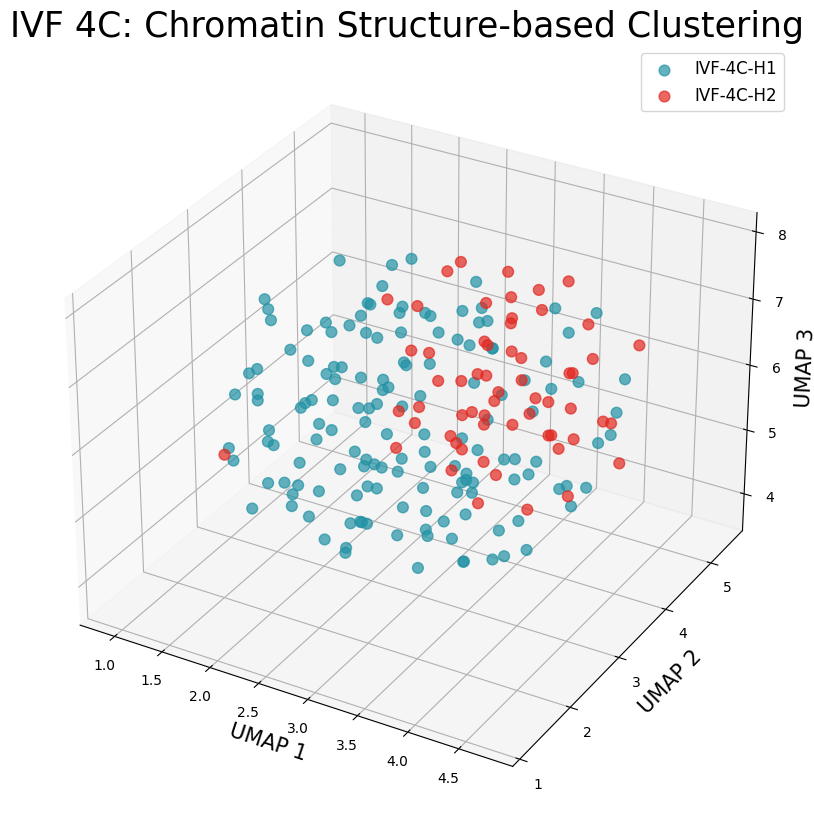

In [6]:
#IVF 4c UMAP 40k TAD boundary_1k_seed 0 10 20 30 60 99
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 0
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/IVF_4C_40k_1k_TADboundary_distribution.txt", sep="\t", index_col=0).transpose()

# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# 主成分分析（PCA），并可视化 PCA 的方差比例
sc.tl.pca(adata, random_state=seed)

# 使用 PCA 结果计算细胞之间的近邻关系，使用原始数据进行邻域计算
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 使用 UMAP 算法对数据进行降维
sc.tl.umap(adata, n_components=3, random_state=seed)
# 获取UMAP结果
umap_result = adata.obsm['X_umap']

# 打印UMAP结果的形状
print("umap_result形状:", umap_result.shape)

# 使用 Leiden 算法进行细胞聚类,通过调整resolution大小调整聚类数量多少
sc.tl.leiden(adata, flavor="igraph", resolution=0.845, random_state=seed)

# 获取聚类结果
clusters = adata.obs["leiden"]

# 构建包含细胞 ID 和对应聚类 ID 的列表
data = [(cell_id, cluster_id) for cell_id, cluster_id in clusters.items()]

# 转换为数据框
clusters_df = pd.DataFrame(data, columns=["cell_id", "cluster_id"])
print("clusters_df形状:", clusters_df.shape)

# 将UMAP结果转换为数据框，并设置列名为 'UMAP_1', 'UMAP_2' 和 'UMAP_3'
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# 将聚类结果和UMAP结果左右拼接为一个新的数据框
combined_df = pd.concat([clusters_df, umap_df], axis=1)

# 打印新数据框的形状
print("数据框形状:", combined_df.shape)
print(combined_df)

with open('IVF_4C_40k_TADboundary_1k_UMAP_seed0.txt', 'w') as file:
    # 遍历DataFrame的每一行
    for index, row in combined_df.iterrows():
        # 将每行内容转换为字符串
        line = '\t'.join([str(value) for value in row.values])
        # 写入文件
        file.write(line + '\n')

# 根据细胞数量分配颜色，细胞多的用红色，少的用蓝色
color_map = {cluster_id: '#2292A4' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '#E22720' 
             for cluster_id in cluster_sizes.index}

# 三维绘图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个聚类的散点图，颜色根据聚类的细胞数量
for cluster_id in combined_df["cluster_id"].unique():
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"IVF-4C-H{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,  # 调整散点透明度
        s=60,  # 调整散点大小
        c=color_map[cluster_id]  # 设置颜色
    )

ax.set_title("IVF 4C: Chromatin Structure-based Clustering", fontsize=25)  # 调整标题字体大小
ax.set_xlabel("UMAP 1", fontsize=15)  # 调整x轴标签字体大小
ax.set_ylabel("UMAP 2", fontsize=15)  # 调整y轴标签字体大小
ax.set_zlabel("UMAP 3", fontsize=15)  # 调整z轴标签字体大小
plt.legend(fontsize=12)  # 调整图例字体大小
# 保存图片为 PDF
plt.savefig('IVF_4C_Chromatin_Structure-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)




umap_result形状: (24, 3)
clusters_df形状: (24, 2)
数据框形状: (24, 5)


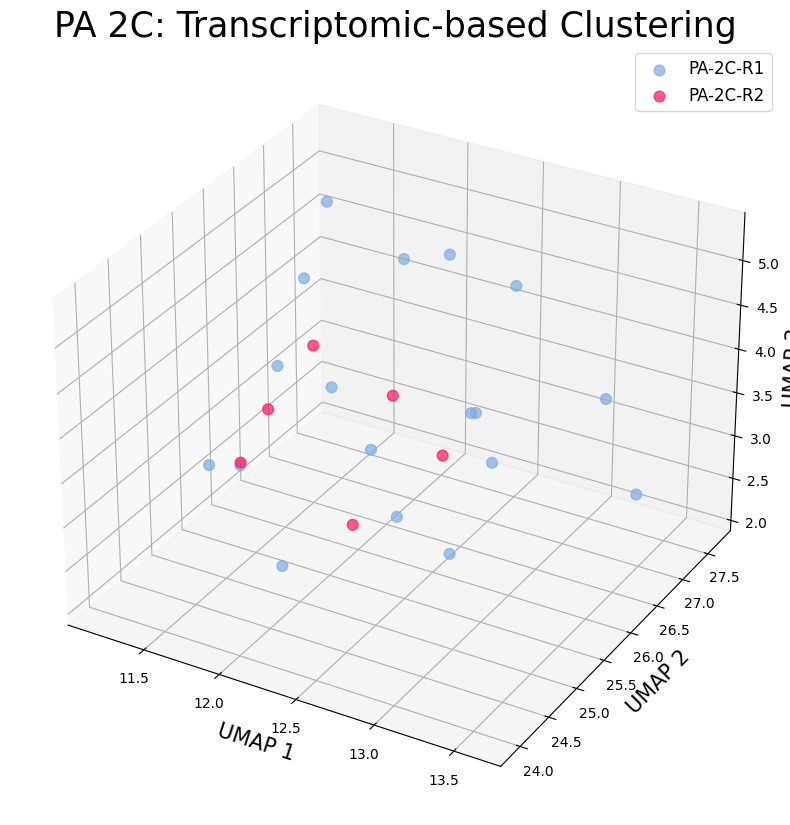

In [17]:
#scRNAseq PA 2c 2024年12月19日 dip seed 0 10 20 30 60 99

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 99
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/PA_2C_all_log2TPM_dip.txt", sep="\t", index_col=0).transpose()
# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# 主成分分析（PCA），并可视化 PCA 的方差比例
sc.tl.pca(adata, random_state=seed)

# 使用 PCA 结果计算细胞之间的近邻关系，使用原始数据进行邻域计算
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 使用 UMAP 算法对数据进行降维
sc.tl.umap(adata, n_components=3, random_state=seed)
# 获取UMAP结果
umap_result = adata.obsm['X_umap']

# 打印UMAP结果的形状
print("umap_result形状:", umap_result.shape)

# 使用 Leiden 算法进行细胞聚类,通过调整resolution大小调整聚类数量多少
sc.tl.leiden(adata, flavor="igraph", resolution=0.55, random_state=seed)

# 获取聚类结果
clusters = adata.obs["leiden"]

# 构建包含细胞 ID 和对应聚类 ID 的列表
data = [(cell_id, cluster_id) for cell_id, cluster_id in clusters.items()]

# 转换为数据框
clusters_df = pd.DataFrame(data, columns=["cell_id", "cluster_id"])
print("clusters_df形状:", clusters_df.shape)

# 将UMAP结果转换为数据框，并设置列名为 'UMAP_1', 'UMAP_2' 和 'UMAP_3'
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# 将聚类结果和UMAP结果左右拼接为一个新的数据框
combined_df = pd.concat([clusters_df, umap_df], axis=1)

# 打印新数据框的形状
print("数据框形状:", combined_df.shape)
#print(combined_df)

with open('PA_2C_dip_seed99.txt', 'w') as file:
    # 遍历DataFrame的每一行
    for index, row in combined_df.iterrows():
        # 将每行内容转换为字符串
        line = '\t'.join([str(value) for value in row.values])
        # 写入文件
        file.write(line + '\n')
        
# 计算每个聚类的细胞数量
cluster_sizes = combined_df["cluster_id"].value_counts()

# 根据细胞数量分配颜色，细胞多的用红色，少的用蓝色
color_map = {cluster_id: '#7dace4' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '#ff165d' 
             for cluster_id in cluster_sizes.index}

# 三维绘图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个聚类的散点图，颜色根据聚类的细胞数量
for cluster_id in combined_df["cluster_id"].unique():
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"PA-2C-R{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,  # 调整散点透明度
        s=60,  # 调整散点大小
        c=color_map[cluster_id]  # 设置颜色
    )

ax.set_title("PA 2C: Transcriptomic-based Clustering", fontsize=25)  # 调整标题字体大小
ax.set_xlabel("UMAP 1", fontsize=15)  # 调整x轴标签字体大小
ax.set_ylabel("UMAP 2", fontsize=15)  # 调整y轴标签字体大小
ax.set_zlabel("UMAP 3", fontsize=15)  # 调整z轴标签字体大小
plt.legend(fontsize=12)  # 调整图例字体大小
# 保存图片为 PDF
plt.savefig('PA_2C_Transcriptomic-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)



umap_result形状: (39, 3)
clusters_df形状: (39, 2)
数据框形状: (39, 5)


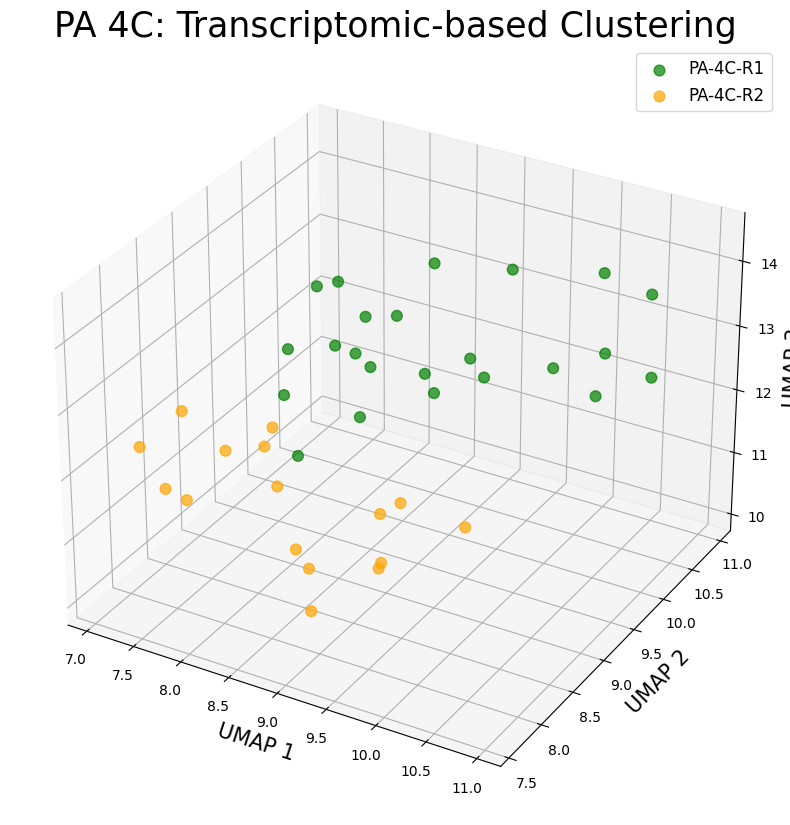

In [19]:
#scRNAseq PA 4c 2024年12月19日 dip seed 0 10 20 30 60 99

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 99
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/PA_4C_all_log2TPM_dip.txt", sep="\t", index_col=0).transpose()
# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# 主成分分析（PCA），并可视化 PCA 的方差比例
sc.tl.pca(adata, random_state=seed)

# 使用 PCA 结果计算细胞之间的近邻关系，使用原始数据进行邻域计算
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 使用 UMAP 算法对数据进行降维
sc.tl.umap(adata, n_components=3, random_state=seed)
# 获取UMAP结果
umap_result = adata.obsm['X_umap']

# 打印UMAP结果的形状
print("umap_result形状:", umap_result.shape)

# 使用 Leiden 算法进行细胞聚类,通过调整resolution大小调整聚类数量多少
sc.tl.leiden(adata, flavor="igraph", resolution=0.55, random_state=seed)

# 获取聚类结果
clusters = adata.obs["leiden"]

# 构建包含细胞 ID 和对应聚类 ID 的列表
data = [(cell_id, cluster_id) for cell_id, cluster_id in clusters.items()]

# 转换为数据框
clusters_df = pd.DataFrame(data, columns=["cell_id", "cluster_id"])
print("clusters_df形状:", clusters_df.shape)

# 将UMAP结果转换为数据框，并设置列名为 'UMAP_1', 'UMAP_2' 和 'UMAP_3'
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])

# 将聚类结果和UMAP结果左右拼接为一个新的数据框
combined_df = pd.concat([clusters_df, umap_df], axis=1)

# 打印新数据框的形状
print("数据框形状:", combined_df.shape)
#print(combined_df)

with open('PA_2C_dip_seed99.txt', 'w') as file:
    # 遍历DataFrame的每一行
    for index, row in combined_df.iterrows():
        # 将每行内容转换为字符串
        line = '\t'.join([str(value) for value in row.values])
        # 写入文件
        file.write(line + '\n')
        
# 计算每个聚类的细胞数量
cluster_sizes = combined_df["cluster_id"].value_counts()

# 根据细胞数量分配颜色，细胞多的用红色，少的用蓝色
color_map = {cluster_id: 'green' if cluster_sizes[cluster_id] > cluster_sizes.mean() else 'orange' 
             for cluster_id in cluster_sizes.index}

# 三维绘图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个聚类的散点图，颜色根据聚类的细胞数量
for cluster_id in combined_df["cluster_id"].unique():
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"PA-4C-R{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,  # 调整散点透明度
        s=60,  # 调整散点大小
        c=color_map[cluster_id]  # 设置颜色
    )

ax.set_title("PA 4C: Transcriptomic-based Clustering", fontsize=25)  # 调整标题字体大小
ax.set_xlabel("UMAP 1", fontsize=15)  # 调整x轴标签字体大小
ax.set_ylabel("UMAP 2", fontsize=15)  # 调整y轴标签字体大小
ax.set_zlabel("UMAP 3", fontsize=15)  # 调整z轴标签字体大小
plt.legend(fontsize=12)  # 调整图例字体大小
# 保存图片为 PDF
plt.savefig('PA_4C_Transcriptomic-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)



umap_result形状: (42, 3)
数据框形状: (42, 5)


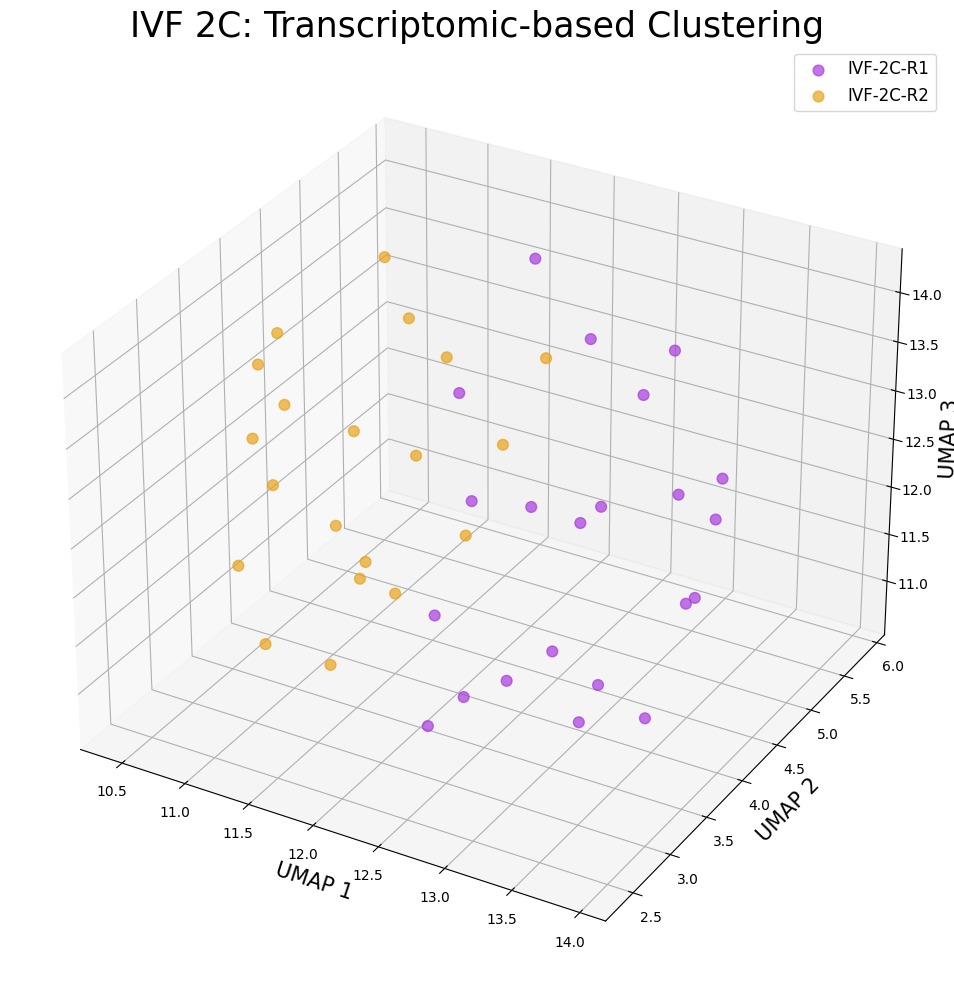

In [24]:
#scRNAseq IVF 2C
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

# 设置绘图字体
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 99
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/IVF_2C_all_log2TPM_dip.txt", sep="\t", index_col=0).transpose()

# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# PCA 降维
sc.tl.pca(adata, random_state=seed)

# 构建邻接图
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 执行UMAP降维至3D
sc.tl.umap(adata, n_components=3, random_state=seed)
umap_result = adata.obsm['X_umap']
print("umap_result形状:", umap_result.shape)

# Leiden 聚类
sc.tl.leiden(adata, flavor="igraph", resolution=0.65, random_state=seed)
clusters = adata.obs["leiden"]

# 构建聚类 + UMAP 数据框
clusters_df = pd.DataFrame(list(clusters.items()), columns=["cell_id", "cluster_id"])
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
combined_df = pd.concat([clusters_df, umap_df], axis=1)
print("数据框形状:", combined_df.shape)

# 保存聚类和UMAP坐标信息
with open('IVF_2C_dip_seed99.txt', 'w') as file:
    for index, row in combined_df.iterrows():
        line = '\t'.join([str(value) for value in row.values])
        file.write(line + '\n')

# 计算聚类大小并排序（从大到小）
cluster_sizes = combined_df["cluster_id"].value_counts()
sorted_cluster_ids = cluster_sizes.sort_values(ascending=False).index.tolist()

# 根据细胞数量分配颜色
color_map = {cluster_id: '#A73BDD' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '#E7A31B' 
             for cluster_id in cluster_sizes.index}

# 绘制三维UMAP聚类图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in sorted_cluster_ids:
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"IVF-2C-R{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,
        s=60,
        c=color_map[cluster_id]
    )

# 图形美化设置
ax.set_title("IVF 2C: Transcriptomic-based Clustering", fontsize=25)
ax.set_xlabel("UMAP 1", fontsize=15)
ax.set_ylabel("UMAP 2", fontsize=15)
ax.set_zlabel("UMAP 3", fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()

# 保存图像
plt.savefig('IVF_2C_Transcriptomic-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)


umap_result形状: (60, 3)
数据框形状: (60, 5)


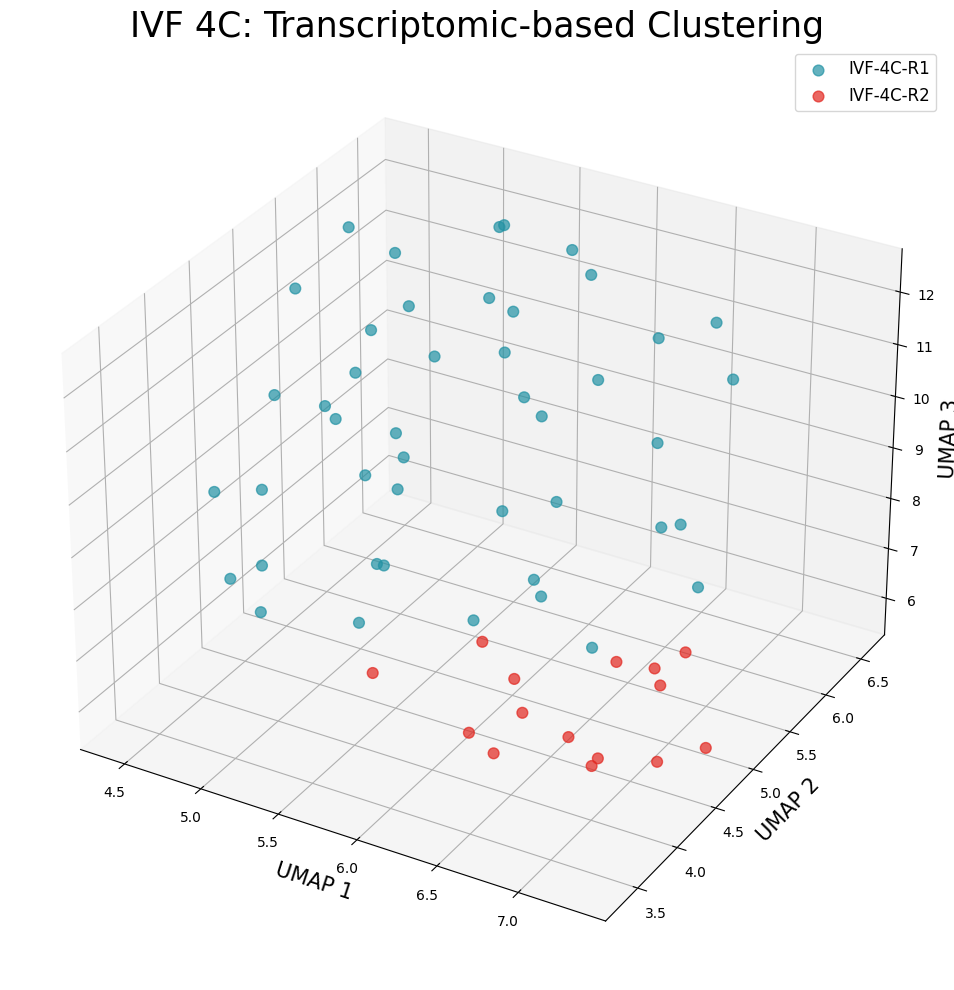

In [29]:
#scRNAseq IVF 4C
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import SVG, display

# 设置绘图字体
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 设置随机种子
seed = 99
np.random.seed(seed)

# 读取表达量矩阵
expression_matrix = pd.read_csv("/home/lihaoxing/jupyter/IVF_4C_all_log2TPM_dip.txt", sep="\t", index_col=0).transpose()

# 创建 AnnData 对象
adata = sc.AnnData(expression_matrix)

# PCA 降维
sc.tl.pca(adata, random_state=seed)

# 构建邻接图
sc.pp.neighbors(adata, use_rep="X", random_state=seed)

# 执行UMAP降维至3D
sc.tl.umap(adata, n_components=3, random_state=seed)
umap_result = adata.obsm['X_umap']
print("umap_result形状:", umap_result.shape)

# Leiden 聚类
sc.tl.leiden(adata, flavor="igraph", resolution=0.45, random_state=seed)
clusters = adata.obs["leiden"]

# 构建聚类 + UMAP 数据框
clusters_df = pd.DataFrame(list(clusters.items()), columns=["cell_id", "cluster_id"])
umap_df = pd.DataFrame(umap_result, columns=["UMAP_1", "UMAP_2", "UMAP_3"])
combined_df = pd.concat([clusters_df, umap_df], axis=1)
print("数据框形状:", combined_df.shape)

# 保存聚类和UMAP坐标信息
with open('IVF_4C_dip_seed99.txt', 'w') as file:
    for index, row in combined_df.iterrows():
        line = '\t'.join([str(value) for value in row.values])
        file.write(line + '\n')

# 计算聚类大小并排序（从大到小）
cluster_sizes = combined_df["cluster_id"].value_counts()
sorted_cluster_ids = cluster_sizes.sort_values(ascending=False).index.tolist()

# 根据细胞数量分配颜色
color_map = {cluster_id: '#2292A4' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '#E22720' 
             for cluster_id in cluster_sizes.index}

# 绘制三维UMAP聚类图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in sorted_cluster_ids:
    cluster_indices = combined_df[combined_df["cluster_id"] == cluster_id].index
    ax.scatter(
        combined_df.loc[cluster_indices, "UMAP_1"],
        combined_df.loc[cluster_indices, "UMAP_2"],
        combined_df.loc[cluster_indices, "UMAP_3"],
        label=f"IVF-4C-R{'1' if cluster_sizes[cluster_id] > cluster_sizes.mean() else '2'}",
        alpha=0.7,
        s=60,
        c=color_map[cluster_id]
    )

# 图形美化设置
ax.set_title("IVF 4C: Transcriptomic-based Clustering", fontsize=25)
ax.set_xlabel("UMAP 1", fontsize=15)
ax.set_ylabel("UMAP 2", fontsize=15)
ax.set_zlabel("UMAP 3", fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()

# 保存图像
plt.savefig('IVF_4C_Transcriptomic-based_Clustering.svg', dpi=300, bbox_inches='tight', transparent=True)
